In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

In [132]:
file = pd.read_csv('/content/drive/MyDrive/3d_classification_data_v0.csv', header = None)
file.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.109837,1.863383,0.329298,-0.449930,0.516813,1.823688,-1.778129,-1.073515,0.215233,1.350280,...,-0.864816,1.594668,1.676952,-0.635462,0.482883,-1.007458,0.324650,-0.779304,-1.490907,-0.753462
1,-0.016212,-0.684415,-1.916950,-0.054101,-0.513287,1.721903,1.141072,-1.570521,-0.090994,0.445278,...,-0.078783,0.685210,0.602517,1.542104,-0.583772,1.459766,1.698026,-0.895469,-0.963192,-1.473529
2,1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,...,-1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000


In [133]:
train = file.iloc[[0, 1]]
target = file.iloc[[2]]

np_train = np.array([train[col].values for col in train.columns])
np_target = np.array([target[col].values for col in target.columns])

In [134]:
def plot_confusion_matrix(confusion_matrix_result):
    plt.imshow(confusion_matrix_result, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

def calculate_missclassifications(np_train, np_target, weights):
  predicted_labels = np.sign(np.dot(np_train, weights))
  missclassifications = np.sum(predicted_labels != np_target)
  return confusion_matrix(np_target, predicted_labels)

def loss(train, target, weight):
    return np.maximum(0, -target * np.dot(train, weight))

def calculate_loss(np_train, np_target, weight):
    return np.sum(loss(np_train, np_target, weight))

def gradient_descent(np_train, np_target, learning_rate = 0.5):
    init_w = np.ones((np_train.shape[1], 1))
    num_iterations = 50
    losses = []
    missclassifications_history = []
    for _ in range(num_iterations):
        gradient = np.dot(np_train.T, -np_target * loss(np_train, np_target, init_w)).reshape(-1, 1)
        init_w -= learning_rate * gradient
        current_loss = calculate_loss(np_train, np_target, init_w)
        losses.append(current_loss)
        missclassifications = calculate_missclassifications(np_train, np_target, init_w)
        missclassfications_error = missclassifications[0, 1] + missclassifications[1, 0]
        missclassifications_history.append(missclassfications_error)
        print("Iteration {}, Loss: {}".format(_, current_loss))
    return missclassifications_history, losses

In [135]:
miss_first, alpha_first = gradient_descent(np_train, np_target, learning_rate= 0.1)
miss_second, alpha_second = gradient_descent(np_train, np_target, learning_rate= 0.01)

Iteration 0, Loss: 465.94739065207335
Iteration 1, Loss: 2917.8249107471233
Iteration 2, Loss: 21548.565953288547
Iteration 3, Loss: 133420.02826466938
Iteration 4, Loss: 988736.1346764982
Iteration 5, Loss: 6118355.162849525
Iteration 6, Loss: 45349035.81037788
Iteration 7, Loss: 280614496.4721586
Iteration 8, Loss: 2079922350.8868294
Iteration 9, Loss: 12870296866.362019
Iteration 10, Loss: 95395033106.71127
Iteration 11, Loss: 590292378578.4038
Iteration 12, Loss: 4375265211706.858
Iteration 13, Loss: 27073586704959.746
Iteration 14, Loss: 200670255086834.7
Iteration 15, Loss: 1241722109727764.2
Iteration 16, Loss: 9203682365170132.0
Iteration 17, Loss: 5.6951220193070536e+16
Iteration 18, Loss: 4.2212419096095264e+17
Iteration 19, Loss: 2.6120510024560036e+18
Iteration 20, Loss: 1.936060215079952e+19
Iteration 21, Loss: 1.1980095275047779e+20
Iteration 22, Loss: 8.87968336494154e+20
Iteration 23, Loss: 5.494635543650348e+21
Iteration 24, Loss: 4.072640718892274e+22
Iteration 25, Lo

## Alpha : 0.1

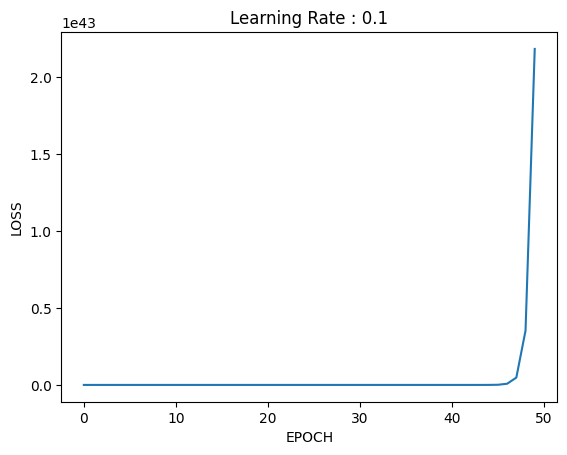

In [136]:
# == Loss 시각화 ==
plt.plot(alpha_first)
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('Learning Rate : 0.1')
plt.savefig('LearningRate(LOSS) : 0.1.png')
plt.show()

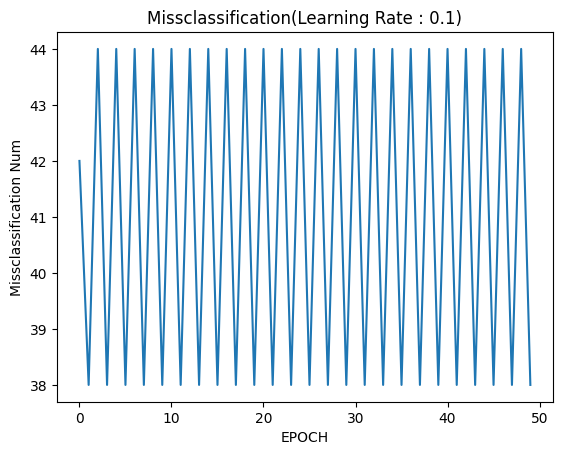

In [137]:
plt.plot(miss_first)
plt.xlabel('EPOCH')
plt.ylabel('Missclassification Num')
plt.title('Missclassification(Learning Rate : 0.1)')
plt.savefig('LearningRate(Missclassifications) : 0.1.png')
plt.show()

## Alpha : 0.01

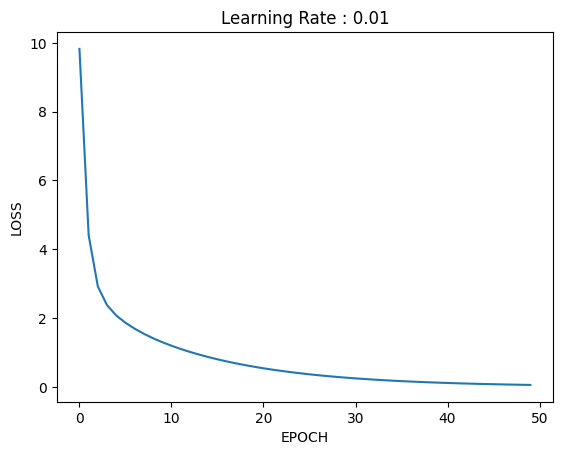

In [138]:
# == Missclassification 시각화 ==
plt.plot(alpha_second)
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('Learning Rate : 0.01')
plt.savefig('LearningRate(LOSS) : 0.01.png')
plt.show()

## Alpha : 0.01

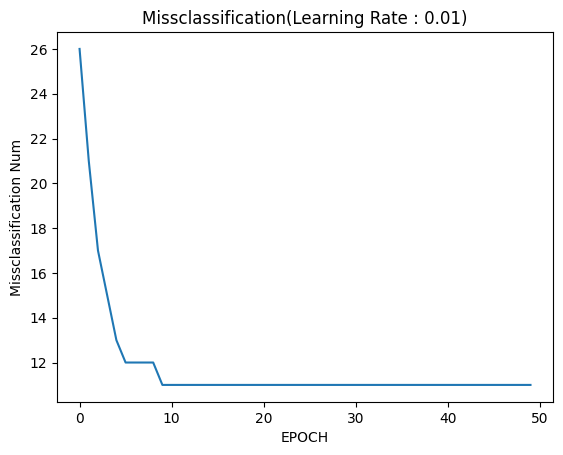

In [139]:
plt.plot(miss_second)
plt.xlabel('EPOCH')
plt.ylabel('Missclassification Num')
plt.title('Missclassification(Learning Rate : 0.01)')
plt.savefig('LearningRate(Missclassifications) : 0.01 .png')
plt.show()